Kelompok : Shogun
Anggota Kelompok : 
1. Yohani Seprini (210711478)
2. Marcella Alicia Ndala (220711907)
3. Mardika Gidion Omega Limbongan (220712025)
4. Aprilius Setio Budi Juja (220712045)
5. Jawara Theo Christo (220712066)

* Note: random_state=78, train_test=0.25 menggunakan 75:25

# Notebook 1: Ridge Regression dan Support Vector Regressor
### Model Regresi
- Perbandingan algoritme berbasis tree dan model

### 1. Data Loading

In [1]:
import pandas as pd
import numpy as np

# load file
df_dataUTS = pd.read_csv('D:\Projek UTS PMDPM_A_SHOGUN\Dataset UTS_Gasal 2425.csv')
# menampilkan 10 data
df_dataUTS.head(10)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1,Luxury
5,79770,3,no,yes,69,54812,10,5,2018,old,yes,8871,7117,240,no,7,7986665.8,Luxury
6,75985,60,yes,no,67,6517,6,9,2009,new,yes,4878,281,384,yes,5,7607322.9,Luxury
7,64169,88,no,yes,6,61711,3,9,2011,new,yes,3054,129,726,no,9,6420823.1,Middle
8,92383,12,no,no,78,71982,3,7,2000,old,no,7507,9056,892,yes,1,9244344.0,Luxury
9,95121,46,no,yes,3,9382,7,9,1994,old,no,615,1221,328,no,10,9515440.4,Luxury


Menghapus baris yang memiliki NaN di kolom tertentu

In [2]:
# menghapus baris yang memiliki NaN di kolom tertentu
df_dataUTS2 = df_dataUTS.dropna(subset=['hasyard', 'haspool', 'hasstormprotector', 'hasstorageroom'])
# menampilkan 10 data setelah penghapusan
df_dataUTS2.head(10)

,squaremeters,numberofrooms,hasyard,haspool,floors,citycode,citypartrange,numprevowners,made,isnewbuilt,hasstormprotector,basement,attic,garage,hasstorageroom,hasguestroom,price,category
0,75523,3,no,yes,63,9373,3,8,2005,old,yes,4313,9005,956,no,7,7559081.5,Luxury
1,55712,58,no,yes,19,34457,6,8,2021,old,no,2937,8852,135,yes,9,5574642.1,Middle
2,86929,100,yes,no,11,98155,3,4,2003,new,no,6326,4748,654,no,10,8696869.3,Luxury
3,51522,3,no,no,61,9047,8,3,2012,new,yes,632,5792,807,yes,5,5154055.2,Middle
4,96470,74,yes,no,21,92029,4,2,2011,new,yes,5414,1172,716,yes,9,9652258.1,Luxury
5,79770,3,no,yes,69,54812,10,5,2018,old,yes,8871,7117,240,no,7,7986665.8,Luxury
6,75985,60,yes,no,67,6517,6,9,2009,new,yes,4878,281,384,yes,5,7607322.9,Luxury
7,64169,88,no,yes,6,61711,3,9,2011,new,yes,3054,129,726,no,9,6420823.1,Middle
8,92383,12,no,no,78,71982,3,7,2000,old,no,7507,9056,892,yes,1,9244344.0,Luxury
9,95121,46,no,yes,3,9382,7,9,1994,old,no,615,1221,328,no,10,9515440.4,Luxury


Menampilkan informasi data

In [3]:
df_dataUTS2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squaremeters       10000 non-null  int64  
 1   numberofrooms      10000 non-null  int64  
 2   hasyard            10000 non-null  object 
 3   haspool            10000 non-null  object 
 4   floors             10000 non-null  int64  
 5   citycode           10000 non-null  int64  
 6   citypartrange      10000 non-null  int64  
 7   numprevowners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isnewbuilt         10000 non-null  object 
 10  hasstormprotector  10000 non-null  object 
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasstorageroom     10000 non-null  object 
 15  hasguestroom       10000 non-null  int64  
 16  price              1000

Menampilkan deskripsi data

In [4]:
df_dataUTS2.describe()

,squaremeters,numberofrooms,floors,citycode,citypartrange,numprevowners,made,basement,attic,garage,hasguestroom,price
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.00000,10000.00000,10000.00000,1.000000e+04
mean,49870.13120,50.358400,50.276300,50225.486100,5.510100,5.521700,2005.48850,5033.103900,5028.01060,553.12120,4.99460,4.993448e+06
std,28774.37535,28.816696,28.889171,29006.675799,2.872024,2.856667,9.30809,2876.729545,2894.33221,262.05017,3.17641,2.877424e+06
min,89.00000,1.000000,1.000000,3.000000,1.000000,1.000000,1990.00000,0.000000,1.00000,100.00000,0.00000,1.031350e+04
25%,25098.50000,25.000000,25.000000,24693.750000,3.000000,3.000000,1997.00000,2559.750000,2512.00000,327.75000,2.00000,2.516402e+06
50%,50105.50000,50.000000,50.000000,50693.000000,5.000000,5.000000,2005.50000,5092.500000,5045.00000,554.00000,5.00000,5.016180e+06
75%,74609.75000,75.000000,76.000000,75683.250000,8.000000,8.000000,2014.00000,7511.250000,7540.50000,777.25000,8.00000,7.469092e+06
max,99999.00000,100.000000,100.000000,99953.000000,10.000000,10.000000,2021.00000,10000.000000,10000.00000,1000.00000,10.00000,1.000677e+07


Train-Test Split

In [5]:
# Ridge Regression dan Support Vector Regressor
from sklearn.model_selection import train_test_split

# menentukan data target dan data feature
X_Regression_ = df_dataUTS2.drop(columns=['price', 'category'])
# menentukan data target
y_Regression_ = df_dataUTS2['price']

X_Regression_train, X_Regression_test, y_Regression_train, y_Regression_test = train_test_split(
    X_Regression_, y_Regression_, test_size=0.25, random_state=78
)

print("X Regression train shape: ", X_Regression_train.shape)
print("X Regression test shape : ", X_Regression_test.shape)

print("Y Regression train shape: ", y_Regression_train.shape)
print("Y Regression test shape: ", y_Regression_test.shape)

print("X_train: \n", X_Regression_train)
print("X_test: \n", X_Regression_test)

X Regression train shape:  (7500, 16)
X Regression test shape :  (2500, 16)
Y Regression train shape:  (7500,)
Y Regression test shape:  (2500,)
X_train: 
       squaremeters  numberofrooms hasyard haspool  floors  citycode  \
6422         20159             23     yes     yes      54     38198   
4355         73097             52     yes      no      53     31906   
3278         78463             33      no      no      79     67986   
4521         60514             46     yes     yes      35     76413   
6774         14185              3     yes      no      94     76994   
...            ...            ...     ...     ...     ...       ...   
6249          6578             34      no     yes      27      2875   
4136         61235             83      no     yes      36       630   
6039         14436             15      no      no       6      9002   
470          71418             20      no     yes      47      2634   
6853         41090             24      no     yes      39     2

### 2. Data Checking

Cek data null, kosong, NaN, duplikat

In [6]:
print("Data null :\n", df_dataUTS2.isnull().sum())
print("\nData kosong :\n", df_dataUTS2.empty)
print("\nData NaN :\n", df_dataUTS2.isna().sum())
print("\nData duplikat :\n", df_dataUTS2.duplicated().sum())

Data null :
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
category             0
dtype: int64

Data kosong :
 False

Data NaN :
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
category             0
dtype: int64

Data duplikat :
 0


Cek data outlier

In [7]:
numerical_columns = df_dataUTS2.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_columns:
    Q1 = df_dataUTS[col].quantile(0.25)
    Q3 = df_dataUTS[col].quantile(0.75)
    IQR = Q3 - Q1
    batas_atas = Q1 - 1.5 * IQR
    batas_bawah = Q3 + 1.5 * IQR

    outliers = ((df_dataUTS2[col] < batas_bawah) | (df_dataUTS2[col] > batas_atas)).sum()
        
    print(f"Data outlier di kolom {col}: {outliers}")
    print("Jumlah baris DataFrame sebelum dibuat outlier", df_dataUTS2.shape[0])

Data outlier di kolom squaremeters: 10000
Jumlah baris DataFrame sebelum dibuat outlier 10000
Data outlier di kolom numberofrooms: 10000
Jumlah baris DataFrame sebelum dibuat outlier 10000
Data outlier di kolom floors: 10000
Jumlah baris DataFrame sebelum dibuat outlier 10000
Data outlier di kolom citycode: 10000
Jumlah baris DataFrame sebelum dibuat outlier 10000
Data outlier di kolom citypartrange: 10000
Jumlah baris DataFrame sebelum dibuat outlier 10000
Data outlier di kolom numprevowners: 10000
Jumlah baris DataFrame sebelum dibuat outlier 10000
Data outlier di kolom made: 10000
Jumlah baris DataFrame sebelum dibuat outlier 10000
Data outlier di kolom basement: 10000
Jumlah baris DataFrame sebelum dibuat outlier 10000
Data outlier di kolom attic: 10000
Jumlah baris DataFrame sebelum dibuat outlier 10000
Data outlier di kolom garage: 10000
Jumlah baris DataFrame sebelum dibuat outlier 10000
Data outlier di kolom hasguestroom: 10000
Jumlah baris DataFrame sebelum dibuat outlier 1000

Mengubah String menjadi Numerik

In [8]:
df_dataUTS2.dtypes

squaremeters           int64
numberofrooms          int64
hasyard               object
haspool               object
floors                 int64
citycode               int64
citypartrange          int64
numprevowners          int64
made                   int64
isnewbuilt            object
hasstormprotector     object
basement               int64
attic                  int64
garage                 int64
hasstorageroom        object
hasguestroom           int64
price                float64
category              object
dtype: object

### 3. Data Preparation

Hanlde missing value

In [9]:
print("Jumlah NaN sebelum penanganan:\n", df_dataUTS2.isnull().sum())

numeric_cols = df_dataUTS2.select_dtypes(include=[np.number]).columns
categorical_cols = df_dataUTS2.select_dtypes(exclude=[np.number]).columns

# data Null
df_dataUTS2[numeric_cols] = df_dataUTS2[numeric_cols].fillna(df_dataUTS2[numeric_cols].median())
for col in categorical_cols:
    df_dataUTS2[col] = df_dataUTS2[col].fillna(df_dataUTS2[col].mode()[0])

# data kosong
df_dataUTS2.dropna(subset=['basement', 'attic'], inplace=True)
# data NaN
df_dataUTS2.fillna(method='ffill', inplace=True)
# pengecekan data tidak ada nilai NaN setelah penanganan
print("\nJumlah NaN setelah penanganan:\n", df_dataUTS2.isnull().sum())


Jumlah NaN sebelum penanganan:
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
category             0
dtype: int64

Jumlah NaN setelah penanganan:
 squaremeters         0
numberofrooms        0
hasyard              0
haspool              0
floors               0
citycode             0
citypartrange        0
numprevowners        0
made                 0
isnewbuilt           0
hasstormprotector    0
basement             0
attic                0
garage               0
hasstorageroom       0
hasguestroom         0
price                0
category             0
dtype: int64


Menghitung dan menampilkan jumlah kemunculan setiap nilai unik dalam kolom price

In [10]:
print(df_dataUTS2['price'].value_counts())

price
7559081.5    1
2600292.1    1
3804577.4    1
3658559.7    1
2316639.4    1
            ..
5555606.6    1
5501007.5    1
9986201.2    1
9104801.8    1
146708.4     1
Name: count, Length: 10000, dtype: int64


Visualisasi data dalam kolom price dalam bentuk plot 

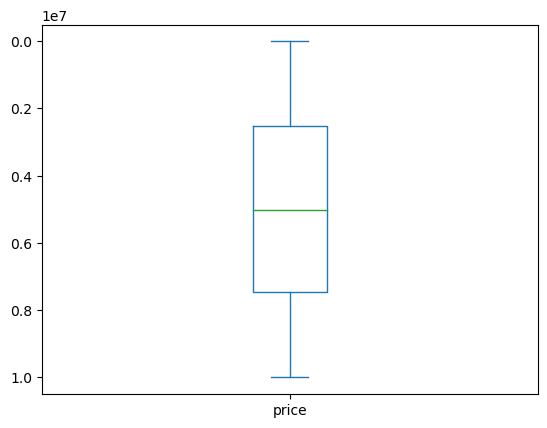

In [11]:
import matplotlib.pyplot as plt

df_dataUTS2.price.plot(kind='box')
plt.gca().invert_yaxis()
plt.show()

Menghapus data outlier

Jumlah baris DataFrame sebelum dibuat outlier 10000
Jumlah baris DataFrame setelah dibuat outlier 0


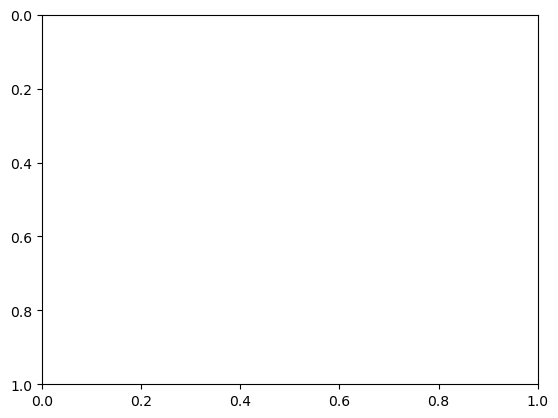

In [12]:
from pandas.api.types import is_numeric_dtype

def remove_outlier(df_dataUTS2):
    for col_name in list(df_dataUTS2.columns):
        if is_numeric_dtype(df_dataUTS2[col_name]):
            Q1 = df_dataUTS2[col_name].quantile(0.25)
            Q3 = df_dataUTS2[col_name].quantile(0.75)

            IQR = Q3 - Q1
            batas_atas = Q1 - 1.5 * IQR
            batas_bawah = Q3 + 1.5 * IQR
            df_dataUTS2 = df_dataUTS2.loc[(df_dataUTS2[col_name] > batas_bawah) & (df_dataUTS2[col_name] < batas_atas)]
    return df_dataUTS2

df_dataUTS_clean = remove_outlier(df_dataUTS)
print("Jumlah baris DataFrame sebelum dibuat outlier", df_dataUTS.shape[0])
print("Jumlah baris DataFrame setelah dibuat outlier", df_dataUTS_clean.shape[0])

# membalik sumbu y
plt.gca().invert_yaxis()
plt.show()

### 4. Data Encoding

One-Hot Encoding pada kolom kategori dalam DataFrame df_dataUTS2

In [13]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# kolom kategori
cat_cols = ["hasyard", "haspool", "isnewbuilt", "hasstormprotector", "hasstorageroom"]

enc = OneHotEncoder()
column_transformer = make_column_transformer(
    (enc, cat_cols),
    remainder='passthrough'
)

# transformasi data latih dan uji
df_dataUTS_encoded = column_transformer.fit_transform(df_dataUTS2)

df_dataUTS_enc = pd.DataFrame(df_dataUTS_encoded, columns=column_transformer.get_feature_names_out())

# menampilkan 10 data
df_dataUTS_enc.head(10)

,onehotencoder__hasyard_no,onehotencoder__hasyard_yes,onehotencoder__haspool_no,onehotencoder__haspool_yes,onehotencoder__isnewbuilt_new,onehotencoder__isnewbuilt_old,onehotencoder__hasstormprotector_no,onehotencoder__hasstormprotector_yes,onehotencoder__hasstorageroom_no,onehotencoder__hasstorageroom_yes,...,remainder__citycode,remainder__citypartrange,remainder__numprevowners,remainder__made,remainder__basement,remainder__attic,remainder__garage,remainder__hasguestroom,remainder__price,remainder__category
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,9373,3,8,2005,4313,9005,956,7,7559081.5,Luxury
1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,34457,6,8,2021,2937,8852,135,9,5574642.1,Middle
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,98155,3,4,2003,6326,4748,654,10,8696869.3,Luxury
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,9047,8,3,2012,632,5792,807,5,5154055.2,Middle
4,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,92029,4,2,2011,5414,1172,716,9,9652258.1,Luxury
5,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,54812,10,5,2018,8871,7117,240,7,7986665.8,Luxury
6,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,6517,6,9,2009,4878,281,384,5,7607322.9,Luxury
7,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,61711,3,9,2011,3054,129,726,9,6420823.1,Middle
8,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,71982,3,7,2000,7507,9056,892,1,9244344.0,Luxury
9,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,9382,7,9,1994,615,1221,328,10,9515440.4,Luxury


One-Hot Encoding pada kolom kategori yang tersisa

In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# menghapus kolom kategori
dataUTS_Regression = df_dataUTS_enc.drop(columns=['remainder__category'])

X_Regression_df = dataUTS_Regression.drop(columns=['remainder__price'], axis=1)
y_Regression_df = dataUTS_Regression['remainder__price']

categorical_cols = X_Regression_df.select_dtypes(include=['object']).columns.tolist()

encoder = OneHotEncoder(sparse_output=False, drop='first')  
X_encoded = encoder.fit_transform(X_Regression_df[categorical_cols])

X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_cols))

X_Regression_processed = pd.concat([X_Regression_df.drop(columns=categorical_cols).reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

Memisahkan data latih dan uji dan melakukan prediksi juga evaluasi model menggunakan Mean Squared Error (MSE)

In [15]:
# memisahkan data latih dan uji
X_Regression_train, X_Regression_test, y_Regression_train, y_Regression_test = train_test_split(X_Regression_processed, y_Regression_df, test_size=0.25, random_state=78)

# latih model regresi 
model = LinearRegression()
model.fit(X_Regression_train, y_Regression_train)

# prediksi dan evaluasi
y_pred = model.predict(X_Regression_test)
mse = mean_squared_error(y_Regression_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 9033814360724.615


### 5. Model Pipeline
### Notebook 1: Ridge Regression dan Support Vector Regressor 
Model Regresi 
- Data scaling: StandarScaler dan MinMaxScaler
- Feature selection: SelectKBest dan SelectPercentile 


Ridge Regression

In [16]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.datasets import fetch_california_housing

# menangani data agar dapat diproses oleh model
X_Regression, y_Regression = fetch_california_housing(return_X_y=True)
X_Reg_train, X_Reg_test, y_Reg_train, y_Reg_test = train_test_split(
    X_Regression, y_Regression, test_size=0.25, random_state=78
)

pipe_RR = Pipeline([
    ('scale', StandardScaler()),  
    ('feature_selection', SelectKBest(score_func=f_regression)),
    ('reg', Ridge())
])
 
params_grid_RR = [
    {
        'scale': [StandardScaler(), MinMaxScaler()],
        'reg__alpha': [0.01, 0.1, 1, 10, 100],
        'feature_selection__k': np.arange(1, X_Regression.shape[1] + 1),
    }
]

GSCV_RR = GridSearchCV(pipe_RR, params_grid_RR, cv=5, scoring='neg_mean_squared_error', error_score='raise')
GSCV_RR.fit(X_Reg_train, y_Reg_train)
print("GSCV RR finished")

GSCV RR finished


Support Vector Regressor

In [17]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

pipe_SVR = Pipeline([
    ('scale', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_regression)),
    ('reg', SVR(kernel='linear')) 
])

params_grid_SVR = {
    'reg__C': [0.1],
    'reg__epsilon': [0.01],
    'reg__kernel': ['linear']
}

GSCV_SVR = GridSearchCV(pipe_SVR, params_grid_SVR, cv=5, scoring='neg_mean_squared_error', verbose=1)
GSCV_SVR.fit(X_Reg_train, y_Reg_train)
print("GSCV SVR finished")

Fitting 5 folds for each of 1 candidates, totalling 5 fits


c:\Users\HP\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(
c:\Users\HP\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:776: UserWarning: k=10 is greater than n_features=8. All the features will be returned.
  warnings.warn(
c:\Users\HP\anaconda

GSCV SVR finished


### 6. Modul Trainig and Evaluation
### Notebook 1: Ridge Regression dan Support Vector Regressor
Model Regresi
- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)

Ridge Regression

In [18]:
# model terbaik
print("Best model: {}".format(GSCV_RR.best_estimator_))
print("RR best parameter: {}".format(GSCV_RR.best_params_))
print("Koefisien/bobot: {}".format(GSCV_RR.best_estimator_.named_steps['reg'].coef_))
print("Intercept/bias: {}".format(GSCV_RR.best_estimator_.named_steps['reg'].intercept_))

# prediksi dan evaluasi
RR_predict = GSCV_RR.predict(X_Reg_test)

# Mean Absolute Error, Mean Squared Error, dan Root Mean Squared Error
mse_RR = mean_squared_error(y_Reg_test, RR_predict)
mae_RR = mean_absolute_error(y_Reg_test, RR_predict)

# menampilkan hasil evaluasi
print("RR Mean Squared Error (MSE): {}".format(mse_RR))
print("RR Mean Absolute Error (MAE): {}".format(mae_RR))
print("RR Root Mean Squared Error: {}".format(np.sqrt(mse_RR)))

Best model: Pipeline(steps=[('scale', MinMaxScaler()),
                ('feature_selection',
                 SelectKBest(k=7,
                             score_func=<function f_regression at 0x000001B3E60C5260>)),
                ('reg', Ridge(alpha=10))])
RR best parameter: {'feature_selection__k': 7, 'reg__alpha': 10, 'scale': MinMaxScaler()}
Koefisien/bobot: [ 5.38424732  0.51647896  0.33737853  1.0863608  -0.46110166 -3.59448646
 -3.85039903]
Intercept/bias: 3.518849378694826
RR Mean Squared Error (MSE): 0.5292117783364576
RR Mean Absolute Error (MAE): 0.5419014138889886
RR Root Mean Squared Error: 0.7274694346406986


Dataframe hasil prediksi

In [19]:
df_result_RR = pd.DataFrame(y_Reg_test, columns=['price'])
df_result_RR['Ridge Prediction'] = RR_predict  

df_result_RR['Selisih_RR'] = df_result_RR['Ridge Prediction'] - df_result_RR['price']
# menampilkan 10 data
df_result_RR.head(10)

,price,Ridge Prediction,Selisih_RR
0,1.69400,1.746399,0.052399
1,1.03400,1.182309,0.148309
2,1.94800,2.085314,0.137314
3,0.97300,1.411370,0.438370
4,1.56800,0.936958,-0.631042
5,2.22400,2.254578,0.030578
6,5.00001,5.187762,0.187752
7,2.91700,1.949299,-0.967701
8,1.60700,2.352955,0.745955
9,0.65900,1.070702,0.411702


Menampilkan deskripsi

In [20]:
df_result_RR.describe()

,price,Ridge Prediction,Selisih_RR
count,5160.000000,5160.000000,5160.000000
mean,2.065956,2.070892,0.004936
std,1.146452,0.842094,0.727523
min,0.175000,-0.697740,-3.456230
25%,1.193750,1.536933,-0.316345
50%,1.811500,2.008589,0.143343
75%,2.652000,2.515508,0.484008
max,5.000010,6.733770,5.317885


Visualisasi perbandingan harga asli dan prediksi

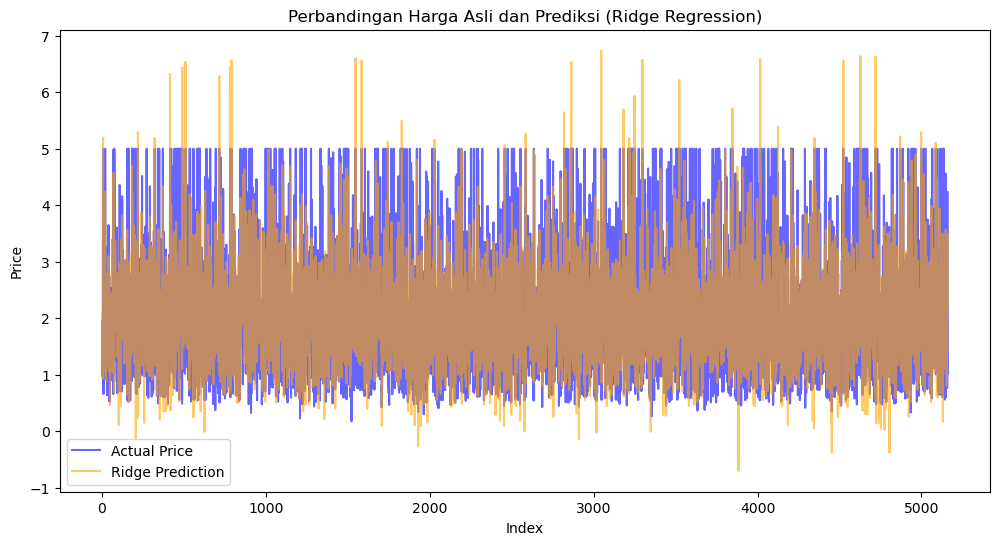

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_result_RR['price'].values, label='Actual Price', color='blue', alpha=0.6)
plt.plot(df_result_RR['Ridge Prediction'].values, label='Ridge Prediction', color='orange', alpha=0.6)


plt.title('Perbandingan Harga Asli dan Prediksi (Ridge Regression)')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

Support Vector Regressor

In [22]:
# model terbaik
print("Best model: {}".format(GSCV_SVR.best_estimator_))
print("SVR best parameters: {}".format(GSCV_SVR.best_params_))
print("Koefisien/bobot: {}".format(GSCV_SVR.best_estimator_.named_steps['reg'].coef_))
print("Intercept/bias: {}".format(GSCV_SVR.best_estimator_.named_steps['reg'].intercept_))

# prediksi dan evaluasi
SVR_predict = GSCV_SVR.predict(X_Reg_test)

# Mean Absolute Error, Mean Squared Error, dan Root Mean Squared Error
mse_SVR = mean_squared_error(y_Reg_test, SVR_predict)
mae_SVR = mean_absolute_error(y_Reg_test, SVR_predict)

# menampilkan hasil evaluasi
print("SVR Mean Squared Error (MSE): {}".format(mse_SVR))
print("SVR Mean Absolute Error (MAE): {}".format(mse_SVR, mae=mae_SVR))
print("SVR Root Mean Squared Error: {}".format(np.sqrt(mse_SVR)))

Best model: Pipeline(steps=[('scale', StandardScaler()),
                ('feature_selection',
                 SelectKBest(score_func=<function f_regression at 0x000001B3E60C5260>)),
                ('reg', SVR(C=0.1, epsilon=0.01, kernel='linear'))])
SVR best parameters: {'reg__C': 0.1, 'reg__epsilon': 0.01, 'reg__kernel': 'linear'}
Koefisien/bobot: [[ 0.90149626  0.09526238 -0.37069496  0.44711206  0.01628014 -0.86613743
  -0.75817469 -0.74041239]]
Intercept/bias: [1.94026887]
SVR Mean Squared Error (MSE): 5.453608640218653
SVR Mean Absolute Error (MAE): 5.453608640218653
SVR Root Mean Squared Error: 2.3352962639071415


Dataframe hasil prediksi

In [23]:
df_result_SVR = pd.DataFrame(y_Reg_test, columns=['price'])
df_result_SVR['Support Vector Prediction'] = SVR_predict

df_result_SVR['Selisih_SVR'] = df_result_SVR['Support Vector Prediction'] - df_result_SVR['price']
# menampilkan 10 data
df_result_SVR.head(10)

,price,Support Vector Prediction,Selisih_SVR
0,1.69400,1.647896,-0.046104
1,1.03400,1.118079,0.084079
2,1.94800,2.055923,0.107923
3,0.97300,1.186351,0.213351
4,1.56800,0.803383,-0.764617
5,2.22400,2.078692,-0.145308
6,5.00001,5.248312,0.248302
7,2.91700,2.049635,-0.867365
8,1.60700,1.915809,0.308809
9,0.65900,0.718163,0.059163


Menampilkan dekripsi

In [24]:
df_result_SVR.describe()

,price,Support Vector Prediction,Selisih_SVR
count,5160.000000,5160.000000,5160.000000
mean,2.065956,1.919703,-0.146253
std,1.146452,2.413103,2.330938
min,0.175000,-157.894124,-159.269124
25%,1.193750,1.356945,-0.401258
50%,1.811500,1.885434,0.007136
75%,2.652000,2.439391,0.309932
max,5.000010,7.358892,6.045892


Visualisasi perbandingan harga asli dan prediksi

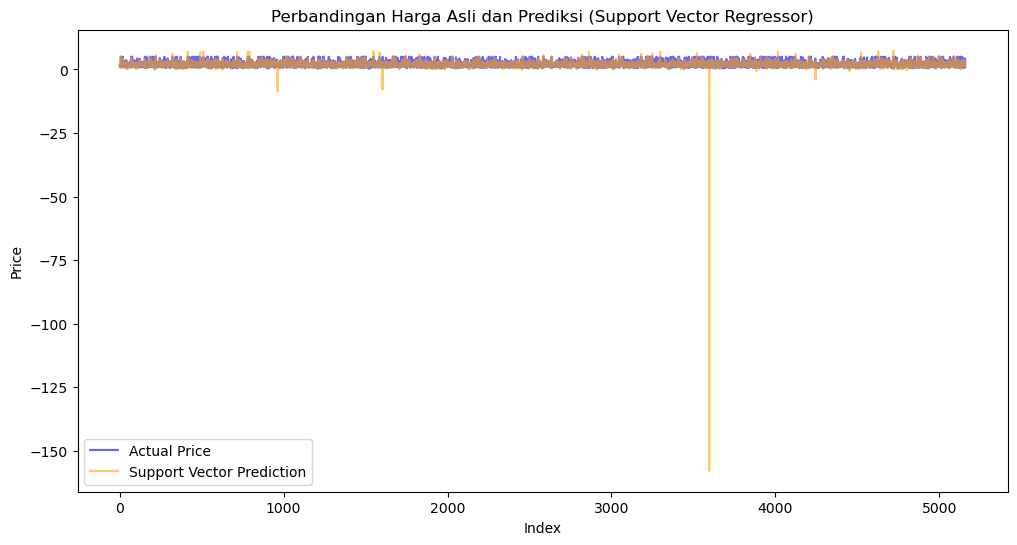

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df_result_SVR['price'].values, label='Actual Price', color='blue', alpha=0.6)
plt.plot(df_result_SVR['Support Vector Prediction'].values, label='Support Vector Prediction', color='orange', alpha=0.6)

plt.title('Perbandingan Harga Asli dan Prediksi (Support Vector Regressor)')
plt.xlabel('Index')
plt.ylabel('Price')
plt.legend()
plt.show()

### 7. Model Deployment Pickle

In [26]:
# import pickle

# with open('BestModel_REG_RandomForest_Shogun.pkl', 'wb') as f:
#     pickle.dump(GSCV_RF, f) # model terbaik adalah Random Forest Regressor

print("Model terbaik berhasil disimpan.")

Model terbaik berhasil disimpan.
